In [25]:
import os
import numpy as np
import tensorflow as tf
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [26]:
import os
os.environ['KAGGLE USERNAME']="nadiasharaz"
os.environ['KAGGLE KEY']="500d9ab35f406405fd207c19240587b7"

In [27]:
!pip install kaggle

In [28]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [29]:
!kaggle datasets download tawsifurrahman/tuberculosis-tb-chest-xray-dataset

100% 662M/663M [00:36<00:00, 17.5MB/s]
100% 663M/663M [00:36<00:00, 19.0MB/s]


In [30]:
!unzip tuberculosis-tb-chest-xray-dataset.zip


Archive:  tuberculosis-tb-chest-xray-dataset.zip
  inflating: TB_Chest_Radiography_Database/Normal.metadata.xlsx  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1005.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1006.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1007.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1008.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1009.png  
  infla

In [31]:
len(os.listdir('/content/TB_Chest_Radiography_Database/Normal'))

3500

In [32]:
len(os.listdir('/content/TB_Chest_Radiography_Database/Tuberculosis'))

700

In [33]:
import cv2
img = cv2.imread('/content/TB_Chest_Radiography_Database/Normal/Normal-10.png')

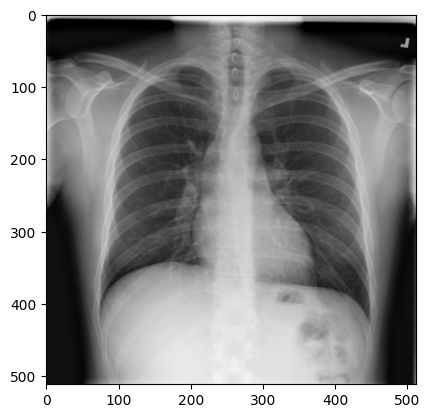

In [34]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [35]:
img.shape

(512, 512, 3)

In [36]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_excel('/content/TB_Chest_Radiography_Database/Tuberculosis.metadata.xlsx')

In [38]:
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,Tuberculosis-1,PNG,512*512,http://tuberculosis.by/
1,Tuberculosis-2,PNG,512*512,http://tuberculosis.by/
2,Tuberculosis-3,PNG,512*512,http://tuberculosis.by/
3,Tuberculosis-4,PNG,512*512,http://tuberculosis.by/
4,Tuberculosis-5,PNG,512*512,http://tuberculosis.by/


In [39]:
urls = os.listdir('/content/TB_Chest_Radiography_Database/Tuberculosis')

In [40]:
path = "/content/TB_Chest_Radiography_Database/Tuberculosis" + urls[0]

In [41]:
path


'/content/TB_Chest_Radiography_Database/TuberculosisTuberculosis-465.png'

In [42]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    #print(img_path)
    # if we want to resize the images
    img = cv2.resize(img, (224, 224))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [43]:
tb_path = "/content/TB_Chest_Radiography_Database/Tuberculosis"
tbUrl = os.listdir(tb_path)
tbImages, tbTargets = loadImages(tb_path, tbUrl, 1)

In [44]:
len(tbUrl), len(tbImages)

(700, 700)

In [45]:
normal_path = "/content/TB_Chest_Radiography_Database/Normal"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

In [46]:
tbImages.shape

(700, 224, 224, 3)

In [47]:
# import tensorflow as tf

# def resize_image(image):
#   """Resizes an image to 224x224."""
#   image = tf.expand_dims(image, axis=0)
#   image = tf.image.resize(tbImages, (224, 224))
#  # image = tf.squeeze(image, axis=0)
#   return image

# image = tf.keras.layers.Input(shape=(100, 100, 3))
# image = resize_image(image)

# #model = tf.keras.applications.VGG16(weights='imagenet', include_top=False)
# #output = model(image)


In [48]:
#image.shape

In [49]:
normalImages.shape

(3500, 224, 224, 3)

In [50]:
# import tensorflow as tf

# def resize_image(image):
#   """Resizes an image to 224x224."""
#   normalimage = tf.expand_dims(normalimage, axis=0)
#   normalimage = tf.image.resize(normalImages, (224, 224))
#  # image = tf.squeeze(image, axis=0)
#   return image

# normalimage = tf.keras.layers.Input(shape=(3500,100, 100, 3))
# normalimage = resize_image(normalimage)


In [51]:
#normalimage.shape

In [52]:
data = np.r_[tbImages, normalImages]

In [53]:
data.shape

(4200, 224, 224, 3)

In [54]:
targets = np.r_[tbTargets, normalTargets]

In [55]:
targets.shape

(4200,)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25, random_state=42)

In [58]:
print ("Shape of an image in X_train: ", x_train[0].shape)
print ("Shape of an image in X_test: ", x_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [59]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(x_train)
y_test = np.array(y_test)
X_test = np.array(x_test)

In [60]:
print("X_train Shape: ", x_train.shape)
print("X_test Shape: ", x_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (3150, 224, 224, 3)
X_test Shape:  (1050, 224, 224, 3)
y_train Shape:  (3150, 2)
y_test Shape:  (1050, 2)


**VGG-16**

In [66]:
from keras.applications import vgg16
img_rows, img_cols = 224,224


vgg = vgg16.VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers
# Layers are set to trainable as True by default
for layer in vgg.layers:
    layer.trainable = False

# Let's print our layers
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [67]:
  def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [68]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model


num_classes = 2

FC_Head = lw(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [69]:
from tensorflow.keras.models import Model
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [70]:

history = model.fit(x_train,y_train,
                    epochs=5,
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/5
99/99 [==============================] - 16s 55ms/step - loss: 0.2399 - accuracy: 0.9098 - val_loss: 0.1006 - val_accuracy: 0.9562
Epoch 2/5
99/99 [==============================] - 3s 32ms/step - loss: 0.1267 - accuracy: 0.9552 - val_loss: 0.1511 - val_accuracy: 0.9514
Epoch 3/5
99/99 [==============================] - 3s 32ms/step - loss: 0.0627 - accuracy: 0.9810 - val_loss: 0.0551 - val_accuracy: 0.9829
Epoch 4/5
99/99 [==============================] - 3s 32ms/step - loss: 0.0479 - accuracy: 0.9844 - val_loss: 0.0491 - val_accuracy: 0.9829
Epoch 5/5
99/99 [==============================] - 3s 32ms/step - loss: 0.0333 - accuracy: 0.9889 - val_loss: 0.0480 - val_accuracy: 0.9876


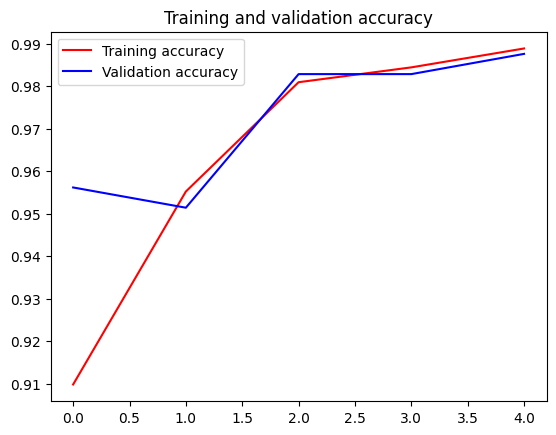

<Figure size 640x480 with 0 Axes>

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()